#### **Simple Linear Regression**
* There will be an independent_variable and a dependent_variable.
* ***Best suited when there is a linear relationship between the two variables.***
##### **What we need for this analysis:**
* `Dataset`: It will only have two variables- one is dependent and another is independent. In this case, we create a dataset namely `house_price.csv`, has an independent variable `area` and the dependent variable `price`. Price will be predicted on the basis of area.
* `Linear Regression Model`: We will use `linear_model` from `sklearn`
##### **Steps of the analysis:**
* `Load the Dataset`: We will load the dataset from the sepific directory
* `Set X and Y`: X = Independent variable and Y = Dependent variable
* `Split Data into Train-Test`: Split data into- x_tarin, x_test, y_train, y_test
* `Reshape Training Data`: Reshape the x_train and y_train to 2-Dimensional since ML models only work on 2D data and our dataset id 1-Dimensional.
* `Fit Data to Model`: Fit the training data to model
* `Test Model using Test Data`: Finally check the model's learning bu testing it using our test data.
##### **How Linear Regression Model Works?**
[Equation of Linear Line: `y = mx + c`]
* In simple linear regression there is one training feature `x` and one label `y`. We have to find `m` and `c` and using these values we can then find `y` for any `x`.
* **How to find `m` and `c`?** The model reads all the training data and finds the best fitted line. The `co-eficient` and `intercept` of the best fitted line is the `m` and `c` respectively.

#### **Lets Start**

**Load the Dataset**: To analyze the linear regression we will use the `housing_data` dataset. From the dataset we will pick one field as training_feature `x` and another as label `y`.
* `x`: is the independent variable (aka- training_feature) on which we will predict y.
* `y`: is the dependent variable (aka- label)

In [1]:
import pandas as pd

#data1 = pd.read_csv('C:/Users/Abs_Sayem/Desktop/ML/machine_learning/ml_projects/dataset/house_price.csv', encoding='utf-8')
data = pd.read_csv('C:/Users/Abs_Sayem/Desktop/ML/machine_learning/ml_projects/dataset/housing_data.csv', encoding='utf-8')

In [2]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


> In our dataset, we have several fields and we can consider any one of them as dependent variable and other one as dependent variable. Let's consider training feature `x` is `sqft_living` and label `y` is `price`. So, based on sqft_living we will predict price after training.

**Setup `X` and `Y`**:

In [3]:
# Setup X and Y
x = data['sqft_living']
y = data['price']

In [4]:
# See X and Y
print(f"Sqft_Living:{x.head().values.flatten()}")
print(f"Price      :{y.head().values.flatten()}")

Sqft_Living:[1180 2570  770 1960 1680]
Price      :[221900 538000 180000 604000 510000]


**Check Null Values**: Check if the dataset contains any null values in the entries

In [5]:
print(x.isnull().sum())
print(y.isnull().sum())

0
0


> So there is no null values in our `x` and `y`

**See Relationship** Lets see if there any relationship between the variables

Text(0, 0.5, 'price')

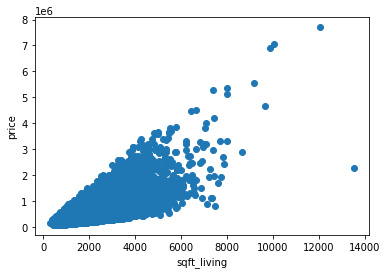

In [6]:
# Checking relationship
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel('sqft_living')
plt.ylabel('price')

> So, we can see that there is a linear relationship between `sqft_living` and `price`. With the increase of `sqft_living` there is a trend of increasing the `price`. Therefore, we can apply linear regression here.

**Split Train-Test dataset**

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=23)
# Random_State: When we split any dataset, random_state helps the split to be different in every run (i.e- reproducible).
#               It can be any number. random_state=0 means- it will be same every time.

In [8]:
print(f"Train Sample: {len(x_train)}")
print(f"Test Sample : {len(x_test)}")

Train Sample: 17290
Test Sample : 4323


**Reshape Data** The ML models takes two dimensional data where we have one dimensioanl data. We have to make them two-dimensional.

In [9]:
import numpy as np
x_train = np.array(x_train).reshape(-1, 1)
x_test  = np.array(x_test).reshape(-1, 1)

In [10]:
print(f"X: {x_train[:10]}")
print(f"Y: {x_test[:10]}")

X: [[4280]
 [2290]
 [1920]
 [2660]
 [3560]
 [1600]
 [2040]
 [1160]
 [1940]
 [1090]]
Y: [[1180]
 [2670]
 [1780]
 [2280]
 [1750]
 [3040]
 [2500]
 [1100]
 [2370]
 [1710]]


**Load Linear Regression Model and Fit to our Dataset**

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

The process is called training in ML. It basically finds the co-eficient `m` and intercept `c` of the linear_line equation: `y=mx+c`. In ML, m and c are called training parameters. We can check the co-eficient and intercept.

In [12]:
# Check the Coeficient and Intercept
m = lr.coef_
c = lr.intercept_
print("Coefficients:", m)
print("Intercept   :", c)

Coefficients: [284.00240546]
Intercept   : -49678.45067106304


Now we have `m` and `c`, and we can calculate `y` for any `x` using the linear_line equation.

##### **Predict**

**Checkout the Train Data**

In [13]:
# For Dataset-1: Here, m=0.46719901 and c=404.24380366603646
y_pred1800 = m*1800 + c
y_pred2500 = m*2500 + c
y_pred4800 = m*4800 + c
y_pred9000 = m*9000 + c
print(f"For x=1800, y={y_pred1800}")
print(f"For x=2500, y={y_pred2500}")
print(f"For x=4800, y={y_pred4800}")
print(f"For x=9000, y={y_pred9000}")

For x=1800, y=[461525.87916208]
For x=2500, y=[660327.56298607]
For x=4800, y=[1313533.09555064]
For x=9000, y=[2506343.19849463]


In [22]:
# By defining the Formula:
y_pred_train = m*x_train + c
print(f"y_train: {y_train[:10].values.flatten()}")
print(f"y_pred : {y_pred_train[:10].flatten()}")  # Flatten made it 1-Dimensional, since it is 2-Dimensional.

y_train: [995500 825000 417000 886000 922755 453000 294000 415000 330000 196000]
y_pred : [1165851.84470996  600687.05783887  495606.16781762  705767.94786013
  961370.1127767   404725.3980695   529686.45647316  279764.33966585
  501286.21592688  259884.17128345]


In [23]:
# Sklearn has a predict module
y1_pred_train = lr.predict(x_train)
print(y1_pred_train)

[1165851.84470996  600687.05783887  495606.16781762 ...  362125.03725008
 1077811.09901647  555246.67296482]


`Check the best fit line`

Text(0, 0.5, 'price')

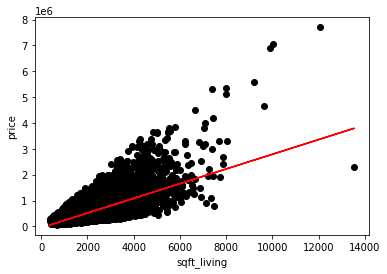

In [24]:
# For actual x1_train and y1_train of Dataset-1
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train, color="black")     # Scatter shows a dotted line of points
plt.plot(x_train,y_pred_train, color="red")           # Plot shows a solid line joining the points
plt.xlabel('sqft_living')
plt.ylabel('price')

**Checkout the Test Data**

In [26]:
# Check using test data for dataset-1:
y_pred_test = lr.predict(x_test)
print(f"Predicted: {y_pred_test[:10]}")
print(f"Actual   : {y_test[:10].values.flatten()}")

Predicted: [285444.38777511 708607.97191476 455845.83105282 597847.03378425
 447325.75888893 813688.86193602 660327.56298607 262724.19533808
 623407.2502759  435965.66267042]
Actual   : [209900 575000 320000 560000 240000 562000 530000 139000 688100 397000]


`Check the best fit line`

Text(0, 0.5, 'price')

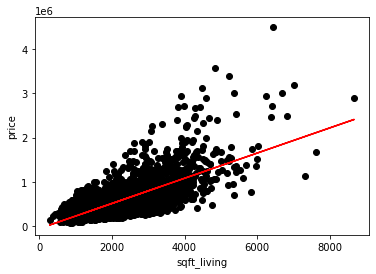

In [28]:
# For actual x_train and y_train of Dataset-1
import matplotlib.pyplot as plt
plt.scatter(x_test,y_test, color="black")     # Scatter shows a dotted line of points
plt.plot(x_test,y_pred_test, color="red")     # Plot shows a solid line joining the points
plt.xlabel('sqft_living')
plt.ylabel('price')